<a href="https://colab.research.google.com/github/gnldyd/Kaggle/blob/main/Dry_Bean_Dataset/dry_bean_dataset_202172213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021 1st semester - machine learning - project

Dry Bean Dataset

202172213 장휘용

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.utils import validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

0. Data processing

0.1. load data

In [3]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip'
# zip_name = url.split('/')[-1]
# !wget --no-check-certificate $url
# !unzip $zip_name
# !rm $zip_name
# file_name = 'Dry_Bean_Dataset.xlsx'
# path = './' + zip_name.split('.')[0] + '/' + file_name
# data = pd.read_excel(path, header=0)
# data.head()

In [4]:
path = './drive/MyDrive/Colab Notebooks/data/uci_dataset/Dry_Bean_Dataset.xlsx'
data = pd.read_excel(path, header=0)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


0.2. Check NaN data

In [5]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

0.3. set x, y

In [6]:
y_column = 'Class'
x_column = data.columns.difference([y_column])

x_data = data[data.columns.difference([y_column])]
y_data = data[[y_column]]

print(x_data.head())
print(y_data.head())

    Area  AspectRation  Compactness  ...  ShapeFactor4  Solidity  roundness
0  28395      1.197191     0.913358  ...      0.998724  0.988856   0.958027
1  28734      1.097356     0.953861  ...      0.998430  0.984986   0.887034
2  29380      1.209713     0.908774  ...      0.999066  0.989559   0.947849
3  30008      1.153638     0.928329  ...      0.994199  0.976696   0.903936
4  30140      1.060798     0.970516  ...      0.999166  0.990893   0.984877

[5 rows x 16 columns]
   Class
0  SEKER
1  SEKER
2  SEKER
3  SEKER
4  SEKER


0.4. feature scaling

In [7]:
x_data_scale = preprocessing.StandardScaler().fit(x_data).transform(x_data)
x_data_scale

array([[-0.84074853, -1.56505251,  1.8391164 , ...,  0.83837103,
         0.36761343,  1.42386707],
       [-0.82918764, -1.96978438,  2.49544929, ...,  0.77113842,
        -0.46290658,  0.23105404],
       [-0.80715717, -1.51429132,  1.76484275, ...,  0.91675514,
         0.51841687,  1.25286494],
       ...,
       [-0.37203825, -0.4486176 ,  0.37053278, ...,  0.39025114,
         0.5913704 ,  0.7584678 ],
       [-0.37176543, -0.38073532,  0.28509849, ...,  0.03644001,
         0.14371712,  0.5817534 ],
       [-0.37135619,  0.14837437, -0.24090425, ...,  0.71371948,
         0.53753905,  0.25368146]])

0.5. label encode

In [8]:
y_encode = y_data.copy()
y_encode[y_column] = pd.factorize(y_data[y_column])[0] + 1
y_encode = validation.column_or_1d(y_encode)
y_encode

array([1, 1, 1, ..., 7, 7, 7])

0.6. split dataset : training and test

In [9]:
random_number = 202172213 # use random seed
x_train, x_test, y_train, y_test = train_test_split(x_data_scale, y_encode, test_size=0.1, random_state=random_number)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/3, random_state=random_number)

print("Sum of data count =", len(x_data))
print("Train data count =", len(x_train))
print("Validation data count =", len(x_val))
print("Test data count =", len(x_test))

Sum of data count = 13611
Train data count = 8166
Validation data count = 4083
Test data count = 1362


0.7. Visualizing the dataset

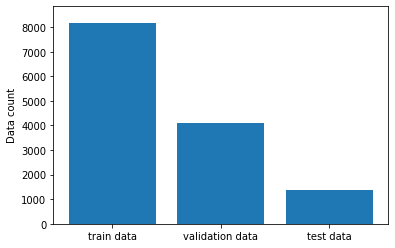

In [10]:
count = [len(x_train), len(x_val), len(x_test)]
plt.bar(np.arange(len(count)), count)
plt.xticks(np.arange(len(count)), ['train data', 'validation data', 'test data'])
gap = max(count) - min(count)
plt.ylim(0, max(count) + gap / 10)
plt.ylabel('Data count')
plt.show()

1. Machine Learning

1.1. Logistic regression

1.1.1. initialize C

In [11]:
lr_C = [100 * 0.5 ** i for i in range(14)]
lr_C

[100.0,
 50.0,
 25.0,
 12.5,
 6.25,
 3.125,
 1.5625,
 0.78125,
 0.390625,
 0.1953125,
 0.09765625,
 0.048828125,
 0.0244140625,
 0.01220703125]

1.1.2. train logistic regression models

In [12]:
lr_models = []
for c in tqdm(lr_C):
  lr_models.append(LogisticRegression(C = c, random_state=random_number, max_iter=3000).fit(x_train, y_train))

100%|██████████| 14/14 [00:41<00:00,  3.00s/it]


1.1.3. Comparison of accuracy of each logistic regression model using validation data set

100%|██████████| 14/14 [00:00<00:00, 687.74it/s]


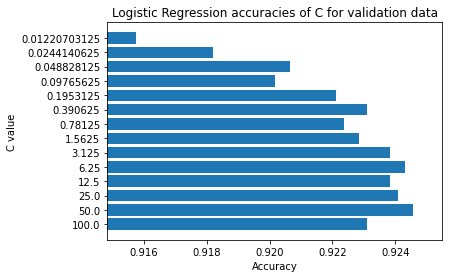

In [13]:
lr_accuracies = []
for model in tqdm(lr_models):
  lr_accuracies.append(accuracy_score(y_val, model.predict(x_val)))

plt.barh(np.arange(len(lr_accuracies)), lr_accuracies)
plt.yticks(np.arange(len(lr_C)), lr_C)
plt.xlim(0.999 * min(lr_accuracies), 1.001 * max(lr_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('Logistic Regression accuracies of C for validation data')
plt.show()

1.1.4. Best accuracy logistic regression model of validation data set

In [14]:
lr_max_accuracy_index = lr_accuracies.index(max(lr_accuracies))
print('Best accuracy =', lr_accuracies[lr_max_accuracy_index], ', and the C value =', lr_C[lr_max_accuracy_index])

Best accuracy = 0.9245652706343375 , and the C value = 50.0


1.1.5. Accuracy of model using test data set of Logistic Regression

In [15]:
print('Test data accuracy is', accuracy_score(y_test, lr_models[lr_max_accuracy_index].predict(x_test)))

Test data accuracy is 0.922173274596182


1.1.6 Accuracy of 10-fold data

100%|██████████| 14/14 [06:13<00:00, 26.66s/it]


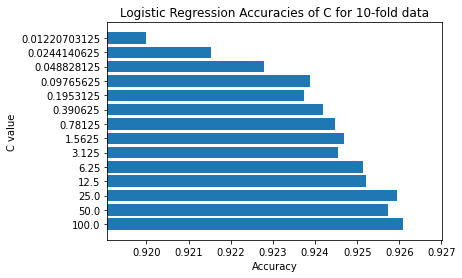

Best accuracy = 0.9260893184483638


In [16]:
fold = 10
x_concat_train_val = np.concatenate((x_train, x_val, x_test), axis=0)
y_concat_train_val = np.concatenate((y_train, y_val, y_test), axis=0)
lr_concat_accuracies = []
for model in tqdm(lr_models):
  lr_concat_accuracies.append(np.mean(cross_val_score(model, x_concat_train_val, y_concat_train_val, cv=fold, n_jobs=fold)))

plt.barh(np.arange(len(lr_concat_accuracies)), lr_concat_accuracies)
plt.yticks(np.arange(len(lr_C)), lr_C)
plt.xlim(0.999 * min(lr_concat_accuracies), 1.001 * max(lr_concat_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('Logistic Regression Accuracies of C for 10-fold data')
plt.show()

print('Best accuracy =', max(lr_concat_accuracies))

1.2. Naive Bayes

1.2.1. train naive bayes model

In [17]:
nb_models = [GaussianNB().fit(x_train, y_train)]

1.2.2. Accuracy of naive bayes model using validation data set

In [18]:
nb_max_accuracy_index = 0
print('Validation data set accuracy =', accuracy_score(y_val, nb_models[nb_max_accuracy_index].predict(x_val)))

Validation data set accuracy = 0.8939505265735979


1.2.3. Accuracy of naive bayes model using test data set

In [19]:
print('Test data set accuracy =', accuracy_score(y_test, nb_models[nb_max_accuracy_index].predict(x_test)))

Test data set accuracy = 0.9001468428781204


1.2.4 Accuracy of 10-fold data

In [20]:
fold = 10
x_concat_train_val = np.concatenate((x_train, x_val), axis=0)
y_concat_train_val = np.concatenate((y_train, y_val), axis=0)

print('10-fold data set accuracy =', np.mean(cross_val_score(nb_models[nb_max_accuracy_index], x_concat_train_val, y_concat_train_val, cv=fold, n_jobs=fold)))

10-fold data set accuracy = 0.8962353608109911


1.3. SVM

1.3.1 initialize C

In [21]:
svm_C = [100 * 0.5 ** i for i in range(10)]
svm_C

[100.0, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125]

1.3.2. train linear kernel SVM

In [22]:
svm_linear_models = []
for c in tqdm(svm_C):
  svm_linear_models.append(SVC(C = c, kernel='linear', random_state=random_number).fit(x_train, y_train))

100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


1.3.3 Comparison of accuracy of each linear kernel svm model using validation data set

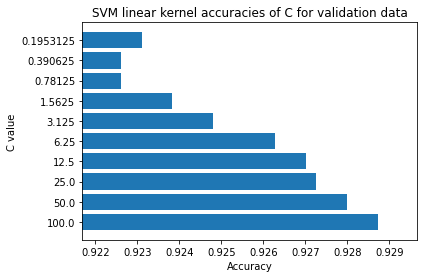

In [23]:
svm_linear_accuracies = []
for model in svm_linear_models:
  svm_linear_accuracies.append(accuracy_score(y_val, model.predict(x_val)))

plt.barh(np.arange(len(svm_linear_accuracies)), svm_linear_accuracies)
plt.yticks(np.arange(len(svm_C)), svm_C)
plt.xlim(0.999 * min(svm_linear_accuracies), 1.001 * max(svm_linear_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('SVM linear kernel accuracies of C for validation data')
plt.show()

1.3.4. Best accuracy linear kernel svm model of validation data set

In [24]:
svm_linear_max_accuracy_index = svm_linear_accuracies.index(max(svm_linear_accuracies))
print('Best accuracy =', svm_linear_accuracies[svm_linear_max_accuracy_index], ', and the C value =', svm_C[svm_linear_max_accuracy_index])

Best accuracy = 0.9287288758265981 , and the C value = 100.0


1.3.5. train poly kernel SVM

In [25]:
svm_poly_models = []
for c in tqdm(svm_C):
  svm_poly_models.append(SVC(C = c, kernel='poly', degree=5, gamma='scale', random_state=random_number).fit(x_train, y_train))

100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


1.3.6 Comparison of accuracy of each poly kernel svm model using validation data set

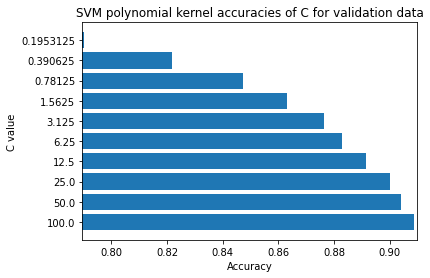

In [26]:
svm_poly_accuracies = []
for model in svm_poly_models:
  svm_poly_accuracies.append(accuracy_score(y_val, model.predict(x_val)))

plt.barh(np.arange(len(svm_poly_accuracies)), svm_poly_accuracies)
plt.yticks(np.arange(len(svm_C)), svm_C)
plt.xlim(0.999 * min(svm_poly_accuracies), 1.001 * max(svm_poly_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('SVM polynomial kernel accuracies of C for validation data')
plt.show()

1.3.7. Best accuracy poly kernel svm model of validation data set

In [27]:
svm_poly_max_accuracy_index = svm_poly_accuracies.index(max(svm_poly_accuracies))
print('Best accuracy =', svm_poly_accuracies[svm_poly_max_accuracy_index], ', and the C value =', svm_C[svm_poly_max_accuracy_index])

Best accuracy = 0.9088905216752388 , and the C value = 100.0


1.3.8. train rbf kernel SVM

In [28]:
svm_rbf_models = []
for c in tqdm(svm_C):
   svm_rbf_models.append(SVC(C = c, kernel='rbf', gamma='scale', random_state=random_number, max_iter=50000).fit(x_train, y_train))

100%|██████████| 10/10 [00:05<00:00,  1.74it/s]


1.3.9 Comparison of accuracy of each rbf kernel svm model using validation data set

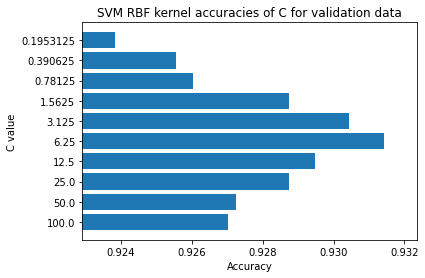

In [29]:
svm_rbf_accuracies = []
for model in svm_rbf_models:
  svm_rbf_accuracies.append(accuracy_score(y_val, model.predict(x_val)))

plt.barh(np.arange(len(svm_rbf_accuracies)), svm_rbf_accuracies)
plt.yticks(np.arange(len(svm_C)), svm_C)
plt.xlim(0.999 * min(svm_rbf_accuracies), 1.001 * max(svm_rbf_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('SVM RBF kernel accuracies of C for validation data')
plt.show()

1.3.10. Best accuracy rbf kernel svm model of validation data set

In [30]:
svm_rbf_max_accuracy_index = svm_rbf_accuracies.index(max(svm_rbf_accuracies))
print('Best accuracy =', svm_rbf_accuracies[svm_rbf_max_accuracy_index], ', and the C value =', svm_C[svm_rbf_max_accuracy_index])

Best accuracy = 0.9314229733039432 , and the C value = 6.25


1.3.11. Accuracy of test dataset each kernel of SVM

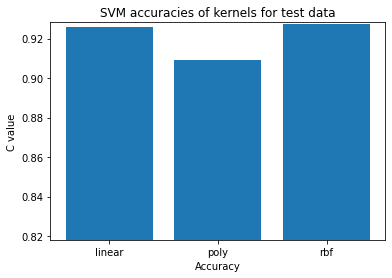

[0.9258443465491923, 0.908957415565345, 0.9273127753303965]


In [31]:
best_svm_models = [svm_linear_models[svm_linear_max_accuracy_index], svm_poly_models[svm_poly_max_accuracy_index], svm_rbf_models[svm_rbf_max_accuracy_index]]
best_svm_accuracies = [model.score(x_test, y_test) for model in best_svm_models]
plt.bar(np.arange(len(best_svm_accuracies)), best_svm_accuracies)
plt.xticks(np.arange(len(best_svm_models)), ['linear', 'poly', 'rbf'])
plt.ylim(0.9 * min(best_svm_accuracies), 1.001 * max(best_svm_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('SVM accuracies of kernels for test data')
plt.show()

print(best_svm_accuracies)

1.3.12 Accuracy of 10-fold data

100%|██████████| 10/10 [01:39<00:00,  9.98s/it]


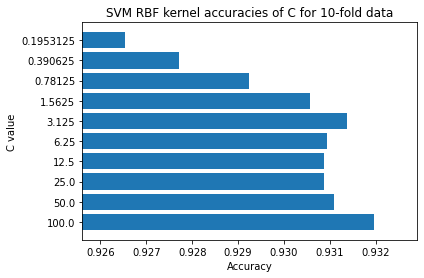

Best accuracy = 0.9319666480011135


In [32]:
fold = 10
x_concat_train_val = np.concatenate((x_train, x_val, x_test), axis=0)
y_concat_train_val = np.concatenate((y_train, y_val, y_test), axis=0)
svm_rbf_concat_accuracies = []
for model in tqdm(svm_rbf_models):
  svm_rbf_concat_accuracies.append(np.mean(cross_val_score(model, x_concat_train_val, y_concat_train_val, cv=fold, n_jobs=fold)))

plt.barh(np.arange(len(svm_rbf_concat_accuracies)), svm_rbf_concat_accuracies)
plt.yticks(np.arange(len(svm_C)), svm_C)
plt.xlim(0.999 * min(svm_rbf_concat_accuracies), 1.001 * max(svm_rbf_concat_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('C value')
plt.title('SVM RBF kernel accuracies of C for 10-fold data')
plt.show()

print('Best accuracy =', max(svm_rbf_concat_accuracies))

1.4. MLP

1.4.1. initialize alpha

In [33]:
alphas = [0.0001 * 2 ** i for i in range(10)]
alphas.insert(0, 0)
alphas

[0,
 0.0001,
 0.0002,
 0.0004,
 0.0008,
 0.0016,
 0.0032,
 0.0064,
 0.0128,
 0.0256,
 0.0512]

1.4.2. train MLP models

In [34]:
mlp_models = []
for a in tqdm(alphas):
  mlp_models.append(MLPClassifier(alpha=a, random_state=random_number, max_iter=1000).fit(x_train, y_train))

100%|██████████| 11/11 [03:03<00:00, 16.65s/it]


1.4.3. Comparison of accuracy of each alpha MLP model using validation data set

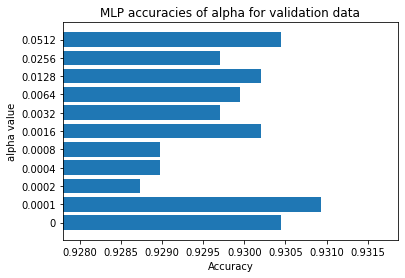

In [35]:
mlp_accuracies = []
for model in mlp_models:
  mlp_accuracies.append(accuracy_score(y_val, model.predict(x_val)))

plt.barh(np.arange(len(mlp_accuracies)), mlp_accuracies)
plt.yticks(np.arange(len(alphas)), alphas)
plt.xlim(0.999 * min(mlp_accuracies), 1.001 * max(mlp_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('alpha value')
plt.title('MLP accuracies of alpha for validation data')
plt.show()

1.4.4. Best accuracy mlp model of validation data set

In [36]:
mlp_accuracy_index = mlp_accuracies.index(max(mlp_accuracies))
print('Best accuracy =', mlp_accuracies[mlp_accuracy_index], ', and the alpha value =', alphas[mlp_accuracy_index])

Best accuracy = 0.9309331373989713 , and the alpha value = 0.0001


1.4.5. Accuracy of model using test data set of MLP

In [37]:
print('Test data accuracy is', accuracy_score(y_test, mlp_models[mlp_accuracy_index].predict(x_test)))

Test data accuracy is 0.9317180616740088


1.4.6. Accuracy of various MLP structures using validation data set

100%|██████████| 11/11 [5:17:13<00:00, 1730.31s/it]


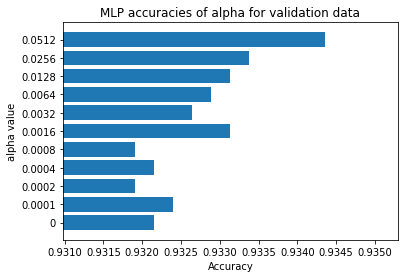

In [38]:
test_range = 10
test_mlp_models = []
for a in tqdm(alphas):
    best_accuracy = 0
    best_model = None
    for front in range(1, test_range + 1):
        for last in range(1, test_range + 1):
            test_model = MLPClassifier(alpha=a, hidden_layer_sizes=(front * 10, last * 10), random_state=random_number, max_iter=1000).fit(x_train, y_train)
            test_accuracy = accuracy_score(y_val, test_model.predict(x_val))
            if test_accuracy > best_accuracy:
                best_model = test_model
                best_accuracy = test_accuracy
    test_mlp_models.append(best_model)

test_mlp_accuracies = []
for model in test_mlp_models:
  test_mlp_accuracies.append(accuracy_score(y_val, model.predict(x_val)))

plt.barh(np.arange(len(test_mlp_accuracies)), test_mlp_accuracies)
plt.yticks(np.arange(len(alphas)), alphas)
plt.xlim(0.999 * min(test_mlp_accuracies), 1.001 * max(test_mlp_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('alpha value')
plt.title('MLP accuracies of alpha for validation data')
plt.show()

1.4.7. Accuracy of various MLP structures using test data set

In [39]:
for i in range(len(alphas)):
  print('alpha = ' + str(alphas[i]) + ', hidden layer = ' + str(test_mlp_models[i].hidden_layer_sizes) + ', test accuracy =', accuracy_score(y_test, test_mlp_models[i].predict(x_test)))

alpha = 0, hidden layer = (50, 90), test accuracy = 0.9309838472834068
alpha = 0.0001, hidden layer = (50, 90), test accuracy = 0.9317180616740088
alpha = 0.0002, hidden layer = (30, 10), test accuracy = 0.9287812041116006
alpha = 0.0004, hidden layer = (50, 90), test accuracy = 0.9317180616740088
alpha = 0.0008, hidden layer = (50, 90), test accuracy = 0.9317180616740088
alpha = 0.0016, hidden layer = (30, 10), test accuracy = 0.9309838472834068
alpha = 0.0032, hidden layer = (60, 80), test accuracy = 0.9317180616740088
alpha = 0.0064, hidden layer = (50, 90), test accuracy = 0.9346549192364171
alpha = 0.0128, hidden layer = (90, 100), test accuracy = 0.9317180616740088
alpha = 0.0256, hidden layer = (40, 100), test accuracy = 0.9287812041116006
alpha = 0.0512, hidden layer = (40, 70), test accuracy = 0.9280469897209985


1.4.8 Accuracy of 10-fold data

100%|██████████| 11/11 [17:14<00:00, 94.04s/it]


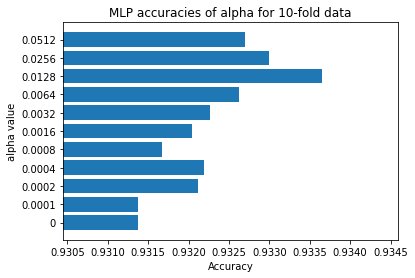

Best accuracy = 0.9336567437133232


In [40]:
fold = 10
x_concat_train_val = np.concatenate((x_train, x_val, x_test), axis=0)
y_concat_train_val = np.concatenate((y_train, y_val, y_test), axis=0)
mlp_concat_accuracies = []
for model in tqdm(mlp_models):
  mlp_concat_accuracies.append(np.mean(cross_val_score(model, x_concat_train_val, y_concat_train_val, cv=fold, n_jobs=fold)))

plt.barh(np.arange(len(mlp_concat_accuracies)), mlp_concat_accuracies)
plt.yticks(np.arange(len(alphas)), alphas)
plt.xlim(0.999 * min(mlp_concat_accuracies), 1.001 * max(mlp_concat_accuracies))

plt.xlabel('Accuracy')
plt.ylabel('alpha value')
plt.title('MLP accuracies of alpha for 10-fold data')
plt.show()

print('Best accuracy =', max(mlp_concat_accuracies))

2. Comparison of performance for each model

2.1 Show bar graph

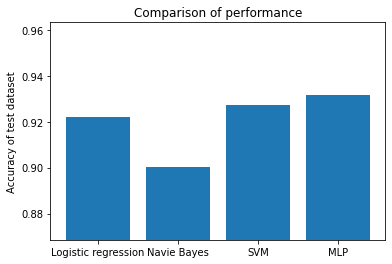

In [41]:
model_names = ['Logistic regression', 'Navie Bayes', 'SVM', 'MLP']
accuracies = [
  accuracy_score(y_test, lr_models[lr_max_accuracy_index].predict(x_test)),
  accuracy_score(y_test, nb_models[nb_max_accuracy_index].predict(x_test)),
  accuracy_score(y_test, svm_rbf_models[svm_rbf_max_accuracy_index].predict(x_test)),
  accuracy_score(y_test, mlp_models[mlp_accuracy_index].predict(x_test))
]
plt.bar(np.arange(len(accuracies)), accuracies)
plt.xticks(np.arange(len(accuracies)), model_names)
gap = max(accuracies) - min(accuracies)
plt.ylim(min(accuracies) - gap, max(accuracies) + gap)
plt.ylabel('Accuracy of test dataset')
plt.title('Comparison of performance')
plt.show()